# ベーた乱数を受理・棄却法で生成
- 目標分布のpdfは既知
- 提案分布として一様分布を使用

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.stats import uniform, beta

In [3]:
np.random.seed()

## 目標分布f

In [4]:
f = beta(a=2.7, b=6.3).pdf

## 提案分布g
- 提案分布から乱数生成するためにgvも保持

In [5]:
gv = uniform
g = gv.pdf

## 分布の上限をしていする定数Mを設定
- ベータ分布のpdfの上限値を指定すればバータ分布を全ておおえる
- 最大値を求めるためにベーた分布のpdfにマイナスをつけて
- 最小値問題に帰着させる


In [6]:
xopt = scipy.optimize.fmin(lambda x: -f(x), 0.0, disp=False)
M = f(xopt)[0]
print("M = ",M)

M =  2.66974399495


In [7]:
Nsim = 100000

## 提案分布gからの乱数Yを生成

In [8]:
Y = gv.rvs(size=Nsim)

## 一様乱数UをNsim個生成

In [9]:
U = uniform.rvs(size=Nsim)

## Yから受理の条件を満たすサンプルXを残して残りを棄却

In [10]:
X = Y[U <= f(Y) / (M * g(Y))]

In [14]:
print("サンプル数: {} => {}".format(len(Y), len(X)))
print("実際の受理率: {}".format(len(X) / float(len(Y))))
print("理想的な受理率: {}".format(1.0/M))

サンプル数: 100000 => 37601
実際の受理率: 0.37601
理想的な受理率: 0.37456774952703703


## 目標分布を描画

In [19]:
x = np.linspace(0.0, 1.0, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

## 提案分布(一様分布)を描画

In [20]:
y = M * uniform.pdf(x)
plt.plot(x, y, 'g-', lw=2)

## 受理した乱数の分布を描画

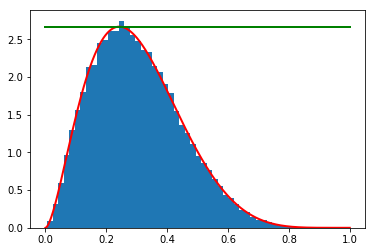

In [21]:
plt.hist(X, bins=50, normed=True)
plt.show()

## プロット

In [23]:
gv = uniform
g = gv.pdf

In [24]:
Nsim = 2000

In [26]:
Y = uniform.rvs(size=Nsim)
U = uniform.rvs(size=Nsim)

In [34]:
acceptedIdx = U <= f(Y) / (M * g(Y))
rejectedIdx = U > f(Y) / (M * g(Y))
print(acceptedIdx)
print(rejectedIdx)

[False False  True ..., False  True  True]
[ True  True False ...,  True False False]


In [35]:
print(Y[acceptedIdx])

[ 0.52650944  0.31926619  0.2090576   0.28375732  0.38992159  0.50968802
  0.21407281  0.37893568  0.29208484  0.41829178  0.26717467  0.40192212
  0.14248943  0.13938016  0.33138852  0.42595312  0.28755842  0.11514139
  0.30418443  0.25624077  0.40820865  0.24472514  0.33152673  0.2615055
  0.34624154  0.14266349  0.22280493  0.30032428  0.47019653  0.2714534
  0.33823413  0.12832146  0.48768337  0.33672163  0.40755077  0.41712384
  0.4129423   0.07366193  0.17621643  0.22276568  0.13109624  0.25908377
  0.580624    0.20288963  0.09434007  0.17490385  0.32010969  0.39462818
  0.25742066  0.4984446   0.29375928  0.32241509  0.14728636  0.30016704
  0.10298908  0.55158937  0.52800929  0.1649055   0.20894341  0.39845406
  0.20780269  0.42951493  0.46684773  0.31864781  0.05889186  0.50497973
  0.24266357  0.09935631  0.52849568  0.27736364  0.23516518  0.29821372
  0.30537376  0.3080439   0.11996695  0.52092051  0.30283702  0.2527522
  0.19266903  0.1717122   0.30331352  0.408549    0.32

In [29]:
x = np.linspace(0.0, 1.0, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

In [31]:
y = M * g(x)
plt.plot(x, y, 'g-', lw=2)

In [32]:
plt.scatter(Y[acceptedIdx], U[acceptedIdx] * M * g(Y[acceptedIdx]), color='red')
plt.scatter(Y[rejectedIdx], U[rejectedIdx] * M * g(Y[rejectedIdx]), color='blue')

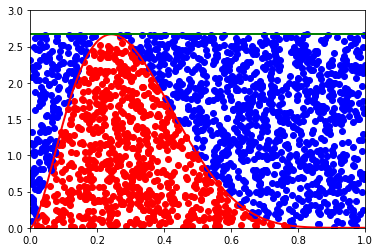

In [33]:
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 3.0))

plt.show()